In [1]:
# MNIST
# generate data  
import numpy as np
import matplotlib.pyplot as plt
import gzip
image_filename = './mnist/train-images-idx3-ubyte.gz'
label_filename = './mnist/train-labels-idx1-ubyte.gz'
def _read32(bytestream):
  dt = np.dtype(np.uint32).newbyteorder('>')
  return np.frombuffer(bytestream.read(4), dtype=dt)[0]

with gzip.open(image_filename) as bytestream:
    magic = _read32(bytestream)
    num_images = _read32(bytestream)
    rows = _read32(bytestream)
    cols = _read32(bytestream)
    buf = bytestream.read(rows * cols * num_images)
    data = np.frombuffer(buf, dtype=np.uint8)
    data = data.reshape(num_images, rows, cols)

with gzip.open(label_filename) as bytestream:
    magic = _read32(bytestream)
    num_items = _read32(bytestream)
    buf = bytestream.read(num_items)
    labels = np.frombuffer(buf, dtype=np.uint8)

Xall = data[:, :, :]
X = Xall[0:256,:,:].reshape(256,28*28)
X = X /255.0

In [7]:
# PCA  
from sklearn.decomposition import PCA
N = 20
pca = PCA(n_components=N)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

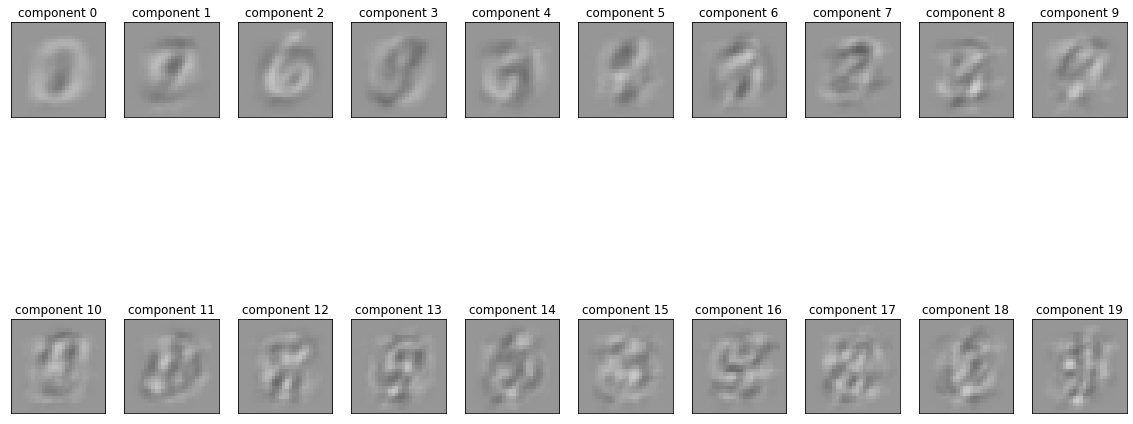

In [9]:
# plot
import matplotlib.pyplot as plt
import matplotlib.cm as cm

cols = 10
rows = int(np.ceil(N/float(cols)))

fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(20,10))

for i in range(N):
    r = i // cols
    c = i % cols
    axes[r, c].imshow(pca.components_[i].reshape(28,28),vmin=-0.5,vmax=0.5, cmap = cm.Greys_r)
    axes[r, c].set_title('component %d' % i)
    axes[r, c].get_xaxis().set_visible(False)
    axes[r, c].get_yaxis().set_visible(False)

In [13]:
print("covariance")
print(pca.get_covariance())
cv = pca.get_covariance()
W, v = np.linalg.eig(cv)
print("eigenvector")
print(v)
print("eigenvalue")
print(W)

covariance
[[6.54607463e-02 1.38059466e-31 3.57583635e-32 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.38059466e-31 6.54607463e-02 1.27261688e-31 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.57583635e-32 1.27261688e-31 6.54607463e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.54607463e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  6.54607463e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 6.54607463e-02]]
eigenvector
[[-1.89580663e-17+0.j -2.50762548e-16+0.j  9.47710372e-17+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 2.25324737e-17+0.j  1.77019534e-17+0.j -1.13600281e-17+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 7.27367166e-17+0.j -1.46817757e-16+0.j  1.49780907e-16+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000

In [17]:
print("eigenvector[0]")
print(v[0])
print("eigenvector[0] -> size")
print(v[0].shape)

eigenvector[0]
[-1.89580663e-17+0.00000000e+00j -2.50762548e-16+0.00000000e+00j
  9.47710372e-17+0.00000000e+00j -1.02680688e-17+0.00000000e+00j
  3.15272498e-16+0.00000000e+00j  5.07961097e-17+0.00000000e+00j
 -1.99865517e-16+0.00000000e+00j -8.16765845e-17+0.00000000e+00j
 -2.04561846e-16+0.00000000e+00j -5.84709098e-16+0.00000000e+00j
  1.38475634e-16+0.00000000e+00j  4.98848885e-16+0.00000000e+00j
  2.78032982e-16+0.00000000e+00j  8.33104647e-17+0.00000000e+00j
 -3.80087108e-16+0.00000000e+00j -2.80385884e-16+0.00000000e+00j
  5.31560219e-16+0.00000000e+00j  3.32179799e-16+0.00000000e+00j
 -6.96556494e-16+0.00000000e+00j -1.07777377e-16+0.00000000e+00j
  1.00000000e+00+0.00000000e+00j -2.81778376e-08+0.00000000e+00j
  3.62767774e-09+0.00000000e+00j  2.32790546e-08+0.00000000e+00j
 -6.53120257e-08+0.00000000e+00j  7.43455408e-09+0.00000000e+00j
  7.36054237e-08+0.00000000e+00j  3.82530987e-08-6.18520029e-08j
  3.82530987e-08+6.18520029e-08j  2.00340649e-08+0.00000000e+00j
  2.780788

In [70]:
print(pca.components_[0:3].shape)
pri_1 = X @ pca.components_[0]
pri_2 = X @ pca.components_[1]
pri_3 = X @ pca.components_[2]
pri_4 = X @ pca.components_[3]
pri_5 = X @ pca.components_[4]
pri_6 = X @ pca.components_[5]
pri_7 = X @ pca.components_[6]
pri_8 = X @ pca.components_[7]
pri_9 = X @ pca.components_[8]

(3, 784)


Text(0.5, 0.92, 'Plot 1- 2- 3')

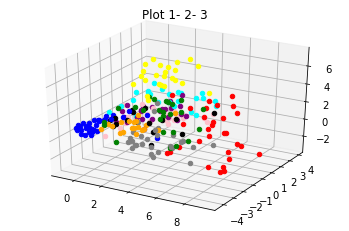

In [71]:
from mpl_toolkits.mplot3d import axes3d 
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
for i in range(256):
    if labels[i] == 0:
        axes.scatter3D(pri_1[i], pri_2[i], pri_3[i], c = 'red')
    elif labels[i] == 1:
        axes.scatter3D(pri_1[i], pri_2[i], pri_3[i], c = 'blue')
    elif labels[i] == 2:
        axes.scatter3D(pri_1[i], pri_2[i], pri_3[i], c = 'green')
    elif labels[i] == 3:
        axes.scatter3D(pri_1[i], pri_2[i], pri_3[i], c = 'gray')
    elif labels[i] == 4:
        axes.scatter3D(pri_1[i], pri_2[i], pri_3[i], c = 'cyan')
    elif labels[i] == 5:
        axes.scatter3D(pri_1[i], pri_2[i], pri_3[i], c = 'black')
    elif labels[i] == 6:
        axes.scatter3D(pri_1[i], pri_2[i], pri_3[i], c = 'yellow')
    elif labels[i] == 7:
        axes.scatter3D(pri_1[i], pri_2[i], pri_3[i], c = 'pink')
    elif labels[i] == 8:
        axes.scatter3D(pri_1[i], pri_2[i], pri_3[i], c = 'orange')
    else:
        axes.scatter3D(pri_1[i], pri_2[i], pri_3[i], c = 'purple')
axes.set_title("Plot 1- 2- 3")

NameError: name 'pri_4' is not defined

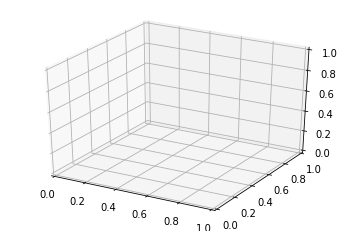

In [69]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
for i in range(256):
    if labels[i] == 0:
        axes.scatter3D(pri_4[i], pri_5[i], pri_6[i], c = 'red')
    elif labels[i] == 1:
        axes.scatter3D(pri_4[i], pri_5[i], pri_6[i], c = 'blue')
    elif labels[i] == 2:
        axes.scatter3D(pri_4[i], pri_5[i], pri_6[i], c = 'green')
    elif labels[i] == 3:
        axes.scatter3D(pri_4[i], pri_5[i], pri_6[i], c = 'gray')
    elif labels[i] == 4:
        axes.scatter3D(pri_4[i], pri_5[i], pri_6[i], c = 'cyan')
    elif labels[i] == 5:
        axes.scatter3D(pri_4[i], pri_5[i], pri_6[i], c = 'black')
    elif labels[i] == 6:
        axes.scatter3D(pri_4[i], pri_5[i], pri_6[i], c = 'yellow')
    elif labels[i] == 7:
        axes.scatter3D(pri_4[i], pri_5[i], pri_6[i], c = 'pink')
    elif labels[i] == 8:
        axes.scatter3D(pri_4[i], pri_5[i], pri_6[i], c = 'orange')
    else:
        axes.scatter3D(pri_4[i], pri_5[i], pri_6[i], c = 'purple')
axes.set_title("Plot 4- 5- 6")